# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Supervised Learning: Logistic Regression - Binary class Classification

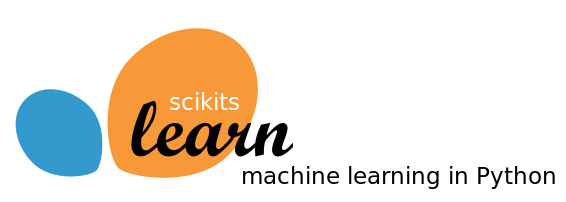

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Training Model</li>
<li> Predicting</li>
</ol>

## Learning Objectives



## Variables
Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N) Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N) this is the target variable

By the end of the lab, you should be able to :
- Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

- Parse columns in the dataframe to create new dataframe columns.

- Create and interpret visualizations to explore the data set and relationships between variables
- Create a logistic regression model to predict loan approval

## Importing Libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Part 1: Logistic Regression

## Loading and Cleaning data with pandas

In [46]:
df = pd.read_csv("loan_train.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [47]:
# lets look at data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [49]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [52]:
df.dropna(subset=['LoanAmount'],inplace =True)

In [50]:
def get_status(value):
    if value == 'Y':
        return 1
    else:
        return 0


In [51]:
df.Loan_Status = df.Loan_Status.map(get_status)
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1  
6             1.0         Urban            1  
7             0.0     Semiurban            0  
8             1.0         Urban            1  
9             1.0     Semiurban            0

## EDA

Choose any features to explore relationship with target variables.

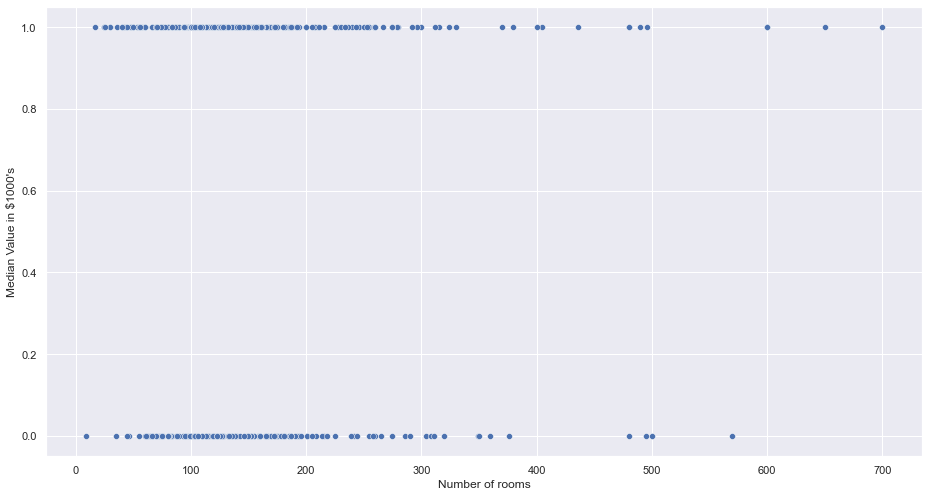

In [77]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df,x = 'LoanAmount',y = 'Loan_Status')
plt.xlabel("Number of rooms")
plt.ylabel("Median Value in $1000's")
plt.show()

## Training Model

In [55]:
model = LogisticRegression()
model

LogisticRegression()

In [78]:
x = df[['LoanAmount']]
y = df.Loan_Status

In [80]:
model.fit(x,y)

LogisticRegression()

In [81]:
model.coef_

array([[-0.00091453]])

In [82]:
model.intercept_

array([0.95511407])

## Prediction

In [84]:
#make prediction for new unseen data
model.predict([[3036]])

array([0], dtype=int64)

In [85]:
#check probability of each class
model.predict_proba([[128],[3036]])

array([[0.30194484, 0.69805516],
       [0.86073524, 0.13926476]])

## Training Logistic Regression with Multiple features Model

In [61]:
reg = LogisticRegression()

In [62]:
df.Loan_Status.value_counts()

1    411
0    181
Name: Loan_Status, dtype: int64

In [63]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [64]:
reg.fit(df[['LoanAmount','ApplicantIncome']],df.Loan_Status)

LogisticRegression()

In [67]:
x_test = [[128,4583],[267,4196]]

## Predicting Value

In [68]:
reg.predict(x_test)

array([1, 1], dtype=int64)

In [69]:
reg.coef_

array([[-1.28187286e-03,  8.94757398e-06]])

In [71]:
reg.intercept_

array([0.96093943])